In [ ]:
from paths import LinearPaths2D
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [ ]:
import torchHED

In [ ]:
out = torchHED.process_img(Image.fromarray(im))

In [ ]:
np.array(im).shape

In [ ]:
np.array(out).shape

In [ ]:
out

In [ ]:
#im = cv2.imread('MIT-logo-black-red.png')
im = cv2.imread('dogs.png')
#im = cv2.imread('degas-ballet-class.jpg')

In [ ]:
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hirachy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
contours = [contour[:,0,:] for contour in contours]

LinearPaths2D(contours).vflip().scale_to(0.3).viz()

In [ ]:
# Canny Edge Detection
#img_blur = cv2.GaussianBlur(im,(3,3), sigmaX=0, sigmaY=0) 
#out = create_line_drawing_image(im)

#im_gray = np.array(Image.fromarray(im).convert('L'))
im_inverted = cv2.bitwise_not(watercolour_image)
img_blur = cv2.GaussianBlur(im_inverted,(3,3),0)
#img_blur = cv2.divide(im_gray, 255 - img_blur, scale=250)
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) 
contours, hirachy = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

contours = [contour[:,0,:] for contour in contours]
LinearPaths2D(contours).vflip().scale_to(0.3).minimum_length(0.01).viz()

In [ ]:
watercolour_image = cv2.stylization(im, sigma_s=100, sigma_r=0.85)

In [ ]:
im_inverted

In [ ]:
Image.fromarray(watercolour_image)

In [ ]:
Image.fromarray(out)

In [ ]:
def create_line_drawing_image(img):
    kernel = np.array([
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        ], np.uint8)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_dilated = cv2.dilate(img_gray, kernel, iterations=1)
    img_diff = cv2.absdiff(img_dilated, img_gray)
    contour = 255 - img_diff
    return contour

def line_art_v2(img):
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    inverted_gray_image = 255 - gray_image
    blurred_img = cv2.GaussianBlur(inverted_gray_image, (21,21),0)
    inverted_blurred_img = 255 - blurred_img
    pencil_sketch_IMG = cv2.divide(gray_image, inverted_blurred_img, scale = 256.0)
    return pencil_sketch_IMG

In [ ]:

Image.fromarray(line_art_v2(im))

In [ ]:
Image.fromarray(create_line_drawing_image(im))

In [ ]:
from IPython.display import SVG, display

In [ ]:
display(SVG('geek95.svg'))

In [ ]:
import cairo
import os

def draw_text(text:str, font:str = 'Poddins', slant:str = 'NORMAL', weight:str = 'NORMAL'):
    """Creates a LinearPaths2D object from text.
    
    Args:
        text: Desired text.
        font: Any of the supported cairo fonts.
        slant: Choose from NORMAL, ITALIC, OBLIQUE.
        weight: Choose from NORMAL, BOLD.
    """
    _FONT_SIZE = 50
    _TEMP_FILE_NAME = 'tmp_pathprocessing'
    with cairo.SVGSurface(_TEMP_FILE_NAME, len(text) * _FONT_SIZE, _FONT_SIZE + 2) as surface:
        # creating a cairo context object for SVG surface
        # using Context method
        Context = cairo.Context(surface)
        # approximate text height
        Context.set_font_size(_FONT_SIZE)
        
        # Font Style
        Context.select_font_face(
            font, cairo.FONT_SLANT_NORMAL, cairo.FONT_WEIGHT_NORMAL)
        
        # position for the text
        Context.move_to(0, _FONT_SIZE)
        
        # displays the text
        Context.text_path(text)
        
        # Width of outline
        Context.set_line_width(1)
        
        # stroke out the color and width property
        Context.stroke()
    
    paths = LinearPaths2D.from_svg(_TEMP_FILE_NAME)
    os.remove(_TEMP_FILE_NAME)
    return paths

draw_text('hallo')

In [ ]:
text_obj

In [ ]:
LinearPaths2D.from_svg('test.svg').scale_to(0.3).viz()

In [ ]:
from svgpathtools import svg2paths, CubicBezier, Line

In [ ]:
svg_paths,_ = svg2paths('spot.svg', *[False]*7)

In [ ]:
svg_paths[27].continuous_subpaths()

In [ ]:
sum([path.continuous_subpaths() for path in svg_paths][10])

In [ ]:
#svg_paths[0][0].points(np.linspace(0,1,20))
paths = []
for path in sum([path.continuous_subpaths() for path in svg_paths], []):
    linear_path = np.concatenate([segment.point(np.linspace(0,1, int(segment.length()/1.0 + 1))) for segment in path])
    paths += [np.vstack([linear_path.real, linear_path.imag]).T]

paths = LinearPaths2D(paths).vflip()

In [ ]:
paths.compress().number_of_segments()

In [ ]:
paths.viz()

In [ ]:
paths.compress().number_of_segments()

In [ ]:
SQUARE = LinearPaths2D([np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])])

In [ ]:
[path.astype(int).tolist() for path in LinearPaths2D.vstack([SQUARE]*5, 0.5)._paths]

In [ ]:
LinearPaths2D.vstack([SQUARE]*5, 0.5).tolist()

In [ ]:
from rdp import rdp

In [ ]:
rdp(paths[1], 2)

In [ ]:
paths = LinearPaths2D([np.array([[0,0], [1,1]]),
                        np.array([[0,0], [0,1], [1,1]]),
                        np.array([[3,-1], [2,3], [1,1]])])

In [ ]:
paths.viz()

In [ ]:
min_x, _, max_x, _ = paths.bbox()
width = float(abs(max_x - min_x))

offset_to_center = min_x + width / 2

#return self.shift(x=-offset_to_center).scale_to(w=-1).shift(x=offset_to_center)


## TOPRA

In [ ]:
from pydrake.all import Toppra, MultibodyPlant, SpatialInertia, PlanarJoint, PiecewisePolynomial, UnitInertia, CalcGridPointsOptions,ToppraDiscretization, PathParameterizedTrajectory

In [ ]:
spot_drawing = LinearPaths2D.from_svg('spot.svg')
spot_drawing = spot_drawing.scale_to(0.45).center().compress(1e-4).minimum_length(0.1).shift(y=0.16)

subtitle = LinearPaths2D.from_string('Spot', font='Poddins').scale_to(0.3).center().shift(0.05).compress()

drawing = LinearPaths2D.vstack([subtitle, spot_drawing]).shift(y=-0.1)
drawing = LinearPaths2D(list(filter(lambda path: len(path)>3, drawing))).shift(-0.05,y=-0.1)
drawing.viz()

In [ ]:
drawing = LinearPaths2D.from_string('p').scale_to(0.2).center().compress()
drawing.viz()

In [ ]:
angle_between(drawing[0][0], drawing[0][1])

In [ ]:
drawing[:1].viz()

In [ ]:
vectors = drawing[0][1:] - drawing[0][:-1]
vectors_u = vectors / np.linalg.norm(vectors, axis = 1)[:,None]

In [ ]:
drawing[0][:0]

In [ ]:
x = [drawing[0][idx][0] for idx in range(len(drawing[0]))]
y = [drawing[0][idx][1] for idx in range(len(drawing[0]))]

x = [drawing[0][idx + 1][0] for idx in sharp_idx]
y = [drawing[0][idx + 1][1] for idx in sharp_idx]
plt.plot(*drawing[0].T)
plt.scatter(x,y)
plt.scatter([drawing[0][0,0]], [drawing[0][0,1]], color='red')
plt.axis('square')

In [ ]:
np.dot(vectors_u, vectors_u)

In [ ]:
vectors.shape

In [ ]:
1/np.linalg.norm(vectors, axis = 1)

In [ ]:
def parametrize_path(drawing_path):
    max_speed = 2
    max_acceleration = 0.3
    plant = MultibodyPlant(0)
    M_B = SpatialInertia(1, np.zeros(3), UnitInertia(1, 1, 1))
    body = plant.AddRigidBody("body", M_B)
    joint = PlanarJoint("joint", plant.world_frame(), body.body_frame(), damping=[0]*3)
    plant.AddJoint(joint)
    plant.Finalize()

    # Slice path at sharp corners.
    vectors = drawing_path[1:] - drawing_path[:-1]
    vectors_u = vectors / np.linalg.norm(vectors, axis = 1)[:,None]
    sharp_idx = []
    for i in range(len(vectors_u)-1):
        angle = np.arccos(np.clip((vectors_u[i]).dot(vectors_u[i+1]), -1.,1.))*180/np.pi
        if angle > 60:
            sharp_idx.append(i+1)
    # If no sharp corners were detected, use entire trajectory.
    if not len(sharp_idx):
        sharp_idx = [0, len(drawing_path)-1]

    # add first index if it was not provided.
    if sharp_idx[0] != 0:
        sharp_idx = [0] + sharp_idx
    # Add last index if it was not provided.
    if sharp_idx[-1] != len(drawing_path)-1:
        sharp_idx.append(len(drawing_path)-1)

    slices = zip(sharp_idx[:-1], sharp_idx[1:])
    strokes = [drawing_path[a:b+1] for a,b in slices]

    # for each stroke solve TOPPRA.
    trajectories = []
    for stroke in strokes:
        breaks = np.arange(len(stroke))
        samples = np.hstack([stroke, np.zeros((len(stroke), 1))])

        #path = PiecewisePolynomial.FirstOrderHold(
        #    breaks, samples.T)
        path = PiecewisePolynomial.CubicShapePreserving(
            breaks, samples.T, True)

        #path = PiecewisePolynomial.CubicHermite(
        #    breaks, samples.T, 3*[0], 3*[0])
        #ts = np.linspace(0, path.end_time(), int(np.ceil(path.end_time()*1/0.01)))
        #new_samples = np.hstack([path.value(t) for t in ts])
        #path = PiecewisePolynomial.CubicWithContinuousSecondDerivatives(
        #    breaks, samples.T, [0,0,0],[0,0,0])

        gridpoints_options = CalcGridPointsOptions()
        #gridpoints_options.max_seg_length = 0.002
        gridpoints_options.max_seg_length = 0.01
        gridpoints_options.max_err = 1e-5
        gridpoints_options.max_iter = 300
        gridpoints_options.min_points = len(stroke)
        gridpoints = Toppra.CalcGridPoints(path, gridpoints_options)

        toppra = Toppra(path=path, plant=plant, gridpoints=gridpoints)
        toppra.AddJointVelocityLimit([-max_speed]*2 + [0], [max_speed]*2 +  [0])
        toppra.AddJointAccelerationLimit([-max_acceleration]*2 + [0], [max_acceleration]*2 + [0], ToppraDiscretization.kInterpolation)

        time_scaling = toppra.SolvePathParameterization()
        trajectories.append(PathParameterizedTrajectory(path, time_scaling))
    
    return trajectories
    #ts = np.linspace(0, trajectory.end_time(), int(np.ceil(trajectory.end_time()*1/0.01)))
    ##new_samples = np.hstack([path.value(trajectory.value(t)) for t in ts])[(0,1),:]
    #
    #
    #
    ##ts = trajectory.get_segment_times()
    ##ts = [-1]
    ##for t in trajectory.get_segment_times():
    ##    if abs(ts[-1] - t) >= 1e-3:
    ##        ts.append(t)
    ##ts = ts[1:]
    ###ts = trajectory.get_segment_times()
    ##
    #
    ##

    ts = np.linspace(0, new_path.end_time(), int(np.ceil(new_path.end_time()*1/0.01)))
    new_path_pos = np.hstack([new_path.value(t) for t in ts])
    new_path_vel = np.hstack([new_path.EvalDerivative(t, 1) for t in ts])
    new_path_acc = np.hstack([new_path.EvalDerivative(t, 2) for t in ts])
    #new_path = PiecewisePolynomial.CubicWithContinuousSecondDerivatives(ts, new_samples, [0,0], [0,0])
    ##new_path = PiecewisePolynomial.CubicShapePreserving(ts, new_samples, True)
    #new_path = PiecewisePolynomial.FirstOrderHold(ts, new_samples)#, True)
    #new_path_pos = np.array([new_path.value(t) for t in ts] + [new_path.value(ts[-1])])
    #new_path_vel = new_path.MakeDerivative(1)
    #path_vel = np.vstack([new_path_vel.value(t).T for t in ts] + [np.array([0,0])])
    #ts = np.hstack([ts, np.array([ts[-1] + 0.3])])
    ##ts = np.array(ts + [ts[-1] + 0.3])
    ##

In [ ]:
optimized_paths = [parametrize_path(path) for path in drawing]

In [ ]:
plot_trajectory(sum(optimized_paths,[]))

In [ ]:
plot_trajectory(optimized_paths)

In [ ]:
ts = np.linspace(0, optimized_paths[0].end_time(), int(np.ceil(optimized_paths[0].end_time()*1/0.01)))
new_path_pos = np.hstack([optimized_paths[0].value(t) for t in ts])
new_path_vel = np.hstack([optimized_paths[0].EvalDerivative(t, 1) for t in ts])
new_path_acc = np.hstack([optimized_paths[0].EvalDerivative(t, 2) for t in ts])


In [ ]:
plt.figure(figsize=(15,15))
plt.plot(ts, new_path_acc[0,:])
plt.plot(ts, new_path_acc[1,:])

In [ ]:
plt.figure(figsize=(15,15))
plt.plot(ts, new_path_vel[0,:])
plt.plot(ts, new_path_vel[1,:])

In [ ]:
plt.figure(figsize=(15,15))
plt.plot(new_path_pos[0,:], new_path_pos[1,:])
plt.axis('square')

In [ ]:
plot_trajectory(optimized_paths)

In [ ]:
visalize_trajectory([new_path], paths, 1/32.)

In [ ]:
visalize_trajectory(traj_list[17:18], drawing, 1/32.)

In [ ]:
from matplotlib.animation import FuncAnimation

In [ ]:
sum(traj_list, PiecewisePolynomial)

In [ ]:
### helpers
 
def plot_trajectory(traj_list):
    plt.figure(figsize=(15, 15))
    for traj in traj_list:
        times = np.linspace(traj.start_time(), traj.end_time(), 1000)
        path = np.hstack([traj.value(t) for t in times]).T
    
        plt.plot(path[:,0], path[:,1])

    plt.axis('square')
    
def visalize_trajectory(x_traj_list, paths, frame_rate = 1/16.0):
    plt.rcParams["animation.html"] = "jshtml"
    plt.rcParams['figure.dpi'] = 80  
    plt.rcParams['animation.embed_limit'] = 8**128
    plt.ioff()
    
    x_traj = x_traj_list[0]
    frame_to_time = np.hstack((np.arange(x_traj.start_time(), x_traj.end_time(),frame_rate),x_traj.end_time()))
    number_of_frames = len(frame_to_time)
    path = np.hstack([x_traj.value(t) for t in frame_to_time]).T

    for x_traj in x_traj_list[1:]:
        frame_to_time = np.hstack((frame_to_time, np.arange(frame_to_time[-1] + x_traj.start_time(), frame_to_time[-1] + x_traj.end_time(),frame_rate),frame_to_time[-1] + x_traj.end_time()))
        frame_to_time_local = np.hstack((np.arange(x_traj.start_time(), x_traj.end_time(),frame_rate), x_traj.end_time()))
        number_of_frames += len(frame_to_time_local)
        path_tmp = np.hstack([x_traj.value(t) for t in frame_to_time_local]).T
        path = np.vstack([path, path_tmp])
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1,1,1)

    def animate(frame_number):
        current_q = path[frame_number]
        ax.clear()
        
        ax.plot(path[:frame_number+1,0], path[:frame_number+1,1], zorder=5, color='blue', linewidth=2.0)
        #ax.plot(ref_path[:,0], ref_path[:,1], zorder=5, color='orange', linewidth=1.0, linestyle='dashed')
        ax.scatter(*current_q, color='red', linewidth=3.0, facecolors='none',zorder=6)
        #c = np.hstack(traj.control_points()[::order]).T
        #ax.scatter(c[:,0], c[:,1], color='green')

        ax.axis('square')
        ax.set_title("t = {:.3f}".format(frame_to_time[frame_number]))
        min_x, min_y, max_x, max_y = paths.bbox
        ax.set_xlim(min_x, max_x)
        ax.set_ylim(min_y, max_y)

    return FuncAnimation(fig, animate, frames=number_of_frames, interval=33.4)
    

In [ ]:
np.arange(0,10,1/6).shape

In [ ]:
a = np.hstack((np.arange(traj_list[0].start_time(), traj_list[0].end_time(),1/32.0),traj_list[0].end_time()))

In [ ]:
np.hstack([a,a]).shape

In [ ]:
16.7*2

In [ ]:
trajectory.end_time()

In [ ]:
visalize_trajectory(trajectory)

In [ ]:
visalize_trajectory(trajectory)

In [ ]:
plot_trajectory(trajectory)

In [ ]:
plt.plot

In [ ]:
np.linspace

In [ ]:
trajectory.start_time()
trajectory.end_time()

In [ ]:
test = False

In [ ]:
test = not test 
print(test)

In [1]:
import paths

In [47]:
test = paths.LinearPaths2D.make_qrcode('h', 0.2, 0.01)
round(sum(sum(sum(test.tolist(), []), [])), 3)

32.566

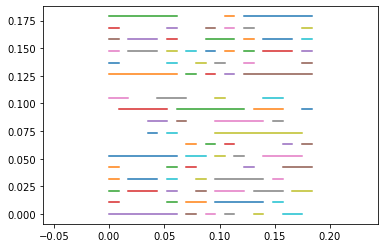

In [32]:
test.viz()

In [43]:
sum(sum(sum(test.tolist(), []), []))

32.565663065961814

In [8]:
import qrcode
import numpy as np
qr = qrcode.QRCode(
    version=None,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=1,
)
qr.add_data("fuck")
qr.make(fit=True)

# Raster image.
im = np.array(qr.make_image(fill_color="black", back_color="white"))
 

In [11]:
im.shape

(230, 230)

In [14]:
im.dtype == float

False